<a href="https://colab.research.google.com/github/awagler2/NODE/blob/main/GMM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
dat=read.csv("encoded_features.csv")


Now that we read original data with the features from the variational autoencoders and the PCA scores, we have to find a reasonable subset of institutions that we can reliably call HSIs. I used the hsi_code having levels 5 or 6

In [2]:
colnames(dat)

table(dat$hsi_code)
dat.hsi=dat[dat$hsi_code %in% c("5","5.0","5R","6","6.0")|dat$excellencia_hsi_status=="HSI",]
#dat.hsi=dat.hsi[dat.hsi$excellencia_hsi_status_x!="",]
dim(dat);dim(dat.hsi)
table(dat$DoE,dat$hsi_code)
table(dat$excellencia_hsi_status,dat$hsi_code)


#df_onehot = extracted_columns = dat.hsi[, c(507:516)+1]

#df_pca = extracted_columns = dat.hsi[, c(517:526)+1]

#head(df_onehot)
#head(df_pca)

[1] "Unnamed..0"                              
  [2] "unitid"                                  
  [3] "year"                                    
  [4] "row_number"                              
  [5] "inst_name"                               
  [6] "longitude"                               
  [7] "latitude"                                
  [8] "address"                                 
  [9] "state_abbr"                              
 [10] "zip"                                     
 [11] "phone_number"                            
 [12] "city"                                    
 [13] "county_name"                             
 [14] "offering_highest_level"                  
 [15] "region"                                  
 [16] "inst_control"                            
 [17] "institution_level.x"                     
 [18] "sector"                                  
 [19] "chief_admin_name"                        
 [20] "chief_admin_title"                       
 [21] "hbcu"                                    
 [22] "primarily_postsecondary"                 
 [23] "hospital"                                
 [24] "medical_degree"                          
 [25] "tribal_college"                          
 [26] "ein"                                     
 [27] "urban_centric_locale"                    
 [28] "opeid"                                   
 [29] "offering_highest_degree"                 
 [30] "currently_active_ipeds"                  
 [31] "date_closed"                             
 [32] "duns"                                    
 [33] "title_iv_indicator"                      
 [34] "offering_undergrad"                      
 [35] "offering_grad"                           
 [36] "inst_status"                             
 [37] "newid"                                   
 [38] "year_deleted"                            
 [39] "url_school"                              
 [40] "degree_granting"                         
 [41] "open_public"                             
 [42] "postsec_public_active"                   
 [43] "postsec_public_active_title_iv"          
 [44] "inst_system_flag"                        
 [45] "inst_system_name"                        
 [46] "reporting_method"                        
 [47] "inst_category"                           
 [48] "land_grant"                              
 [49] "inst_size"                               
 [50] "inst_alias"                              
 [51] "url_fin_aid"                             
 [52] "url_application"                         
 [53] "cbsa"                                    
 [54] "cbsa_type"                               
 [55] "csa"                                     
 [56] "necta"                                   
 [57] "comparison_group"                        
 [58] "county_fips"                             
 [59] "congress_district_id"                    
 [60] "cc_basic_2010"                           
 [61] "cc_instruc_undergrad_2010"               
 [62] "cc_instruc_grad_2010"                    
 [63] "cc_undergrad_2010"                       
 [64] "cc_enroll_2010"                          
 [65] "cc_size_setting_2010"                    
 [66] "cc_basic_2000"                           
 [67] "url_netprice"                            
 [68] "comparison_group_custom"                 
 [69] "url_veterans"                            
 [70] "url_athletes"                            
 [71] "cc_basic_2015"                           
 [72] "cc_instruc_undergrad_2015"               
 [73] "cc_instruc_grad_2015"                    
 [74] "cc_undergrad_2015"                       
 [75] "cc_enroll_2015"                          
 [76] "cc_basic_2018"                           
 [77] "cc_instruc_undergrad_2018"               
 [78] "cc_instruc_grad_2018"                    
 [79] "cc_undergrad_2018"                       
 [80] "cc_enroll_2018"                          
 [81] "cc_size_setting_2018"                    
 [82] "cc_basic_2021"            


          0     1   1.0     2   2.0     3   3.0     4   4.0    4R     5   5.0 
23395     5  4754  5923   951   733   924   910   189    88    17   733   433 
   5R     6   6.0 
   22   547   322 

[1] 39946   527

[1] 2147  527

              
                         0     1   1.0     2   2.0     3   3.0     4   4.0
               23395     5  3736  4736   750   576   733   730   151    72
  Emerging HSI     0     0     0     0     0     0     0     0    38    16
  HSI              0     0     0     0     0     0     0     0     0     0
  Non-HSI          0     0  1018  1187   201   157   191   180     0     0
              
                  4R     5   5.0    5R     6   6.0
                   0   615   369     0   447   262
  Emerging HSI    17     0     0     0     0     0
  HSI              0   118    64    22   100    60
  Non-HSI          0     0     0     0     0     0

              
                         0     1   1.0     2   2.0     3   3.0     4   4.0
               23395     0   988  1205   761   548   210   222    49    25
  Emerging HSI     0     0    31     7     4     3    35    21    74    34
  HSI              0     5     3     1     2     7    19     7    32    11
  Not HSI          0     0  3732  4710   184   175   660   660    34    18
              
                  4R     5   5.0    5R     6   6.0
                   3   169    98     5   134    81
  Emerging HSI     3   216   173     4   174   127
  HSI              3   250    85     8   211    95
  Not HSI          8    98    77     5    28    19

In [3]:
rbind(names(dat.hsi)[grep("exp",names(dat.hsi),ignore.case = TRUE)],grep("exp",names(dat.hsi),ignore.case = TRUE))


sch_exp_net_fellowships,exp_instruc_total,exp_instruc_salaries,exp_research_total,exp_research_salaries,exp_pub_serv_total,exp_pub_serv_salaries,exp_res_pub_serv_total,exp_res_pub_serv_salaries,exp_acad_supp_total,⋯,exp_onetime_purchases,exp_ongoing_subscriptions,exp_other_materials_services,exp_total_materials_services,exp_preservation_services,exp_other_operation_maint,exp_total_operation_maint,exp_total,exp_total_wo_fringe_benefit,lib_exp_greater_100k
135,136,137,138,139,140,141,142,143,144,⋯,371,372,373,374,375,376,377,378,379,384


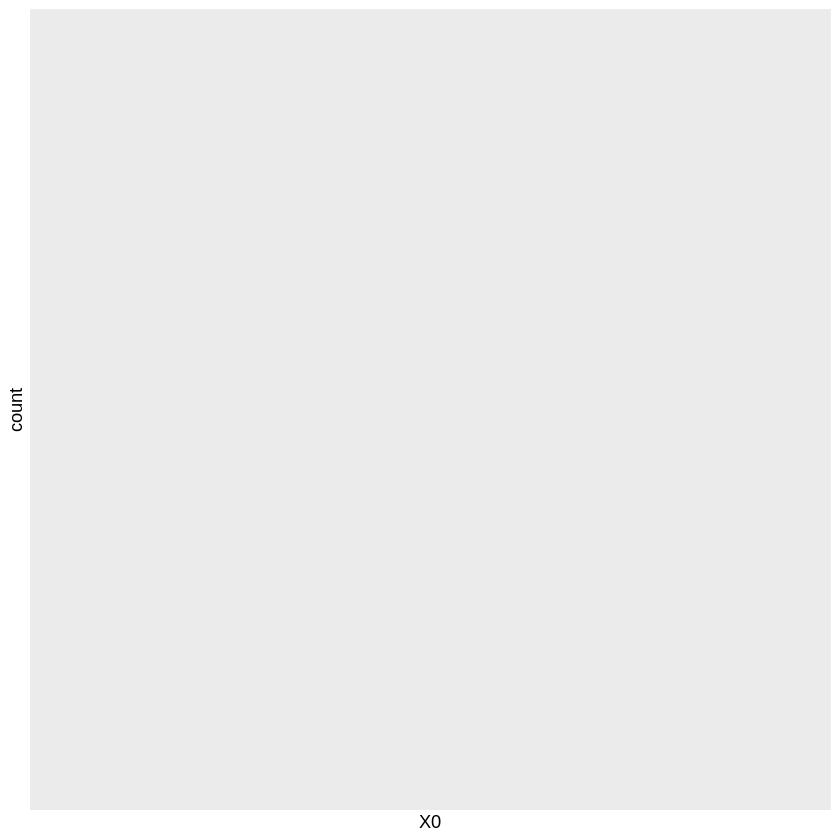

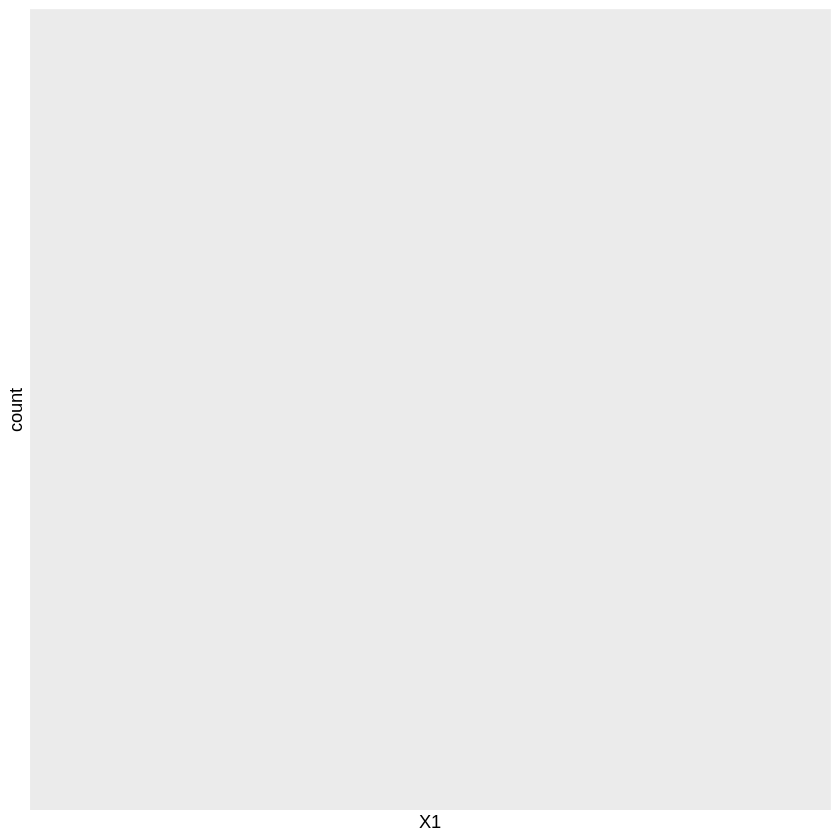

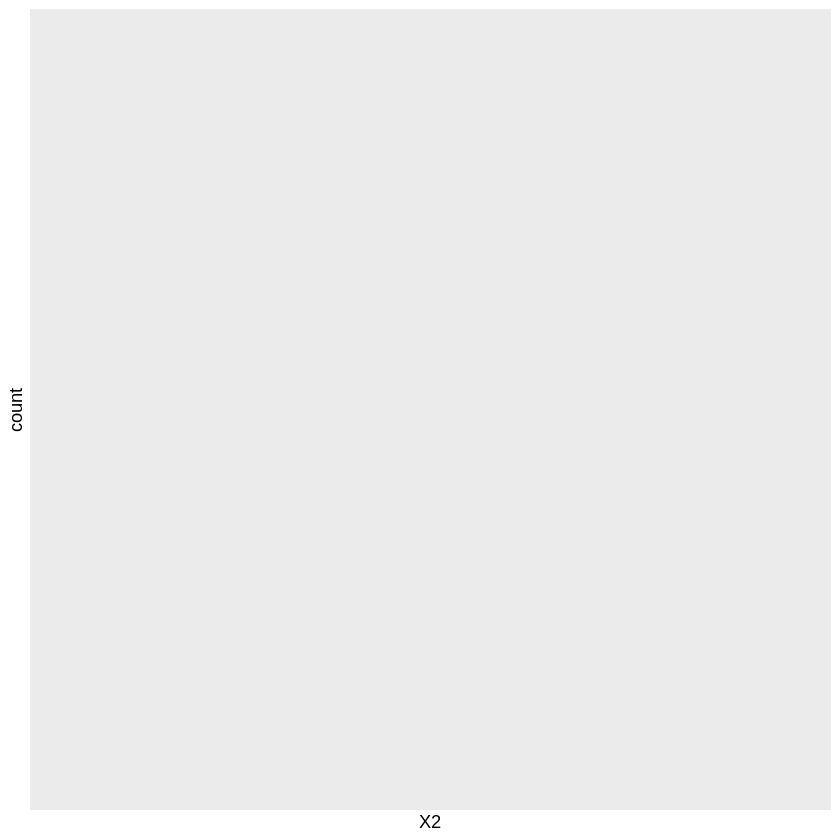

In [4]:
library(ggplot2)


ggplot(dat.hsi[dat.hsi$year_x=="2017",],aes(x=X0,color=DoE))+
  geom_histogram(fill="white",bins=10)

ggplot(dat.hsi[dat.hsi$year_x=="2017",],aes(x=X1,color=DoE))+
  geom_histogram(fill="white",bins=10)

ggplot(dat.hsi[dat.hsi$year_x=="2017",],aes(x=X2,color=DoE))+
  geom_histogram(fill="white",bins=10)

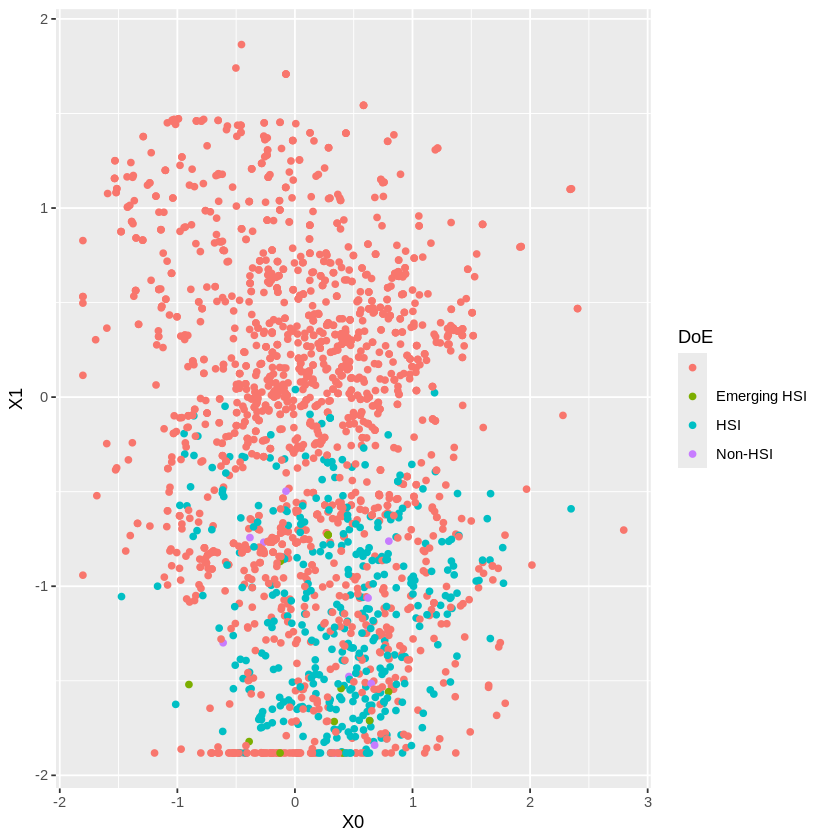

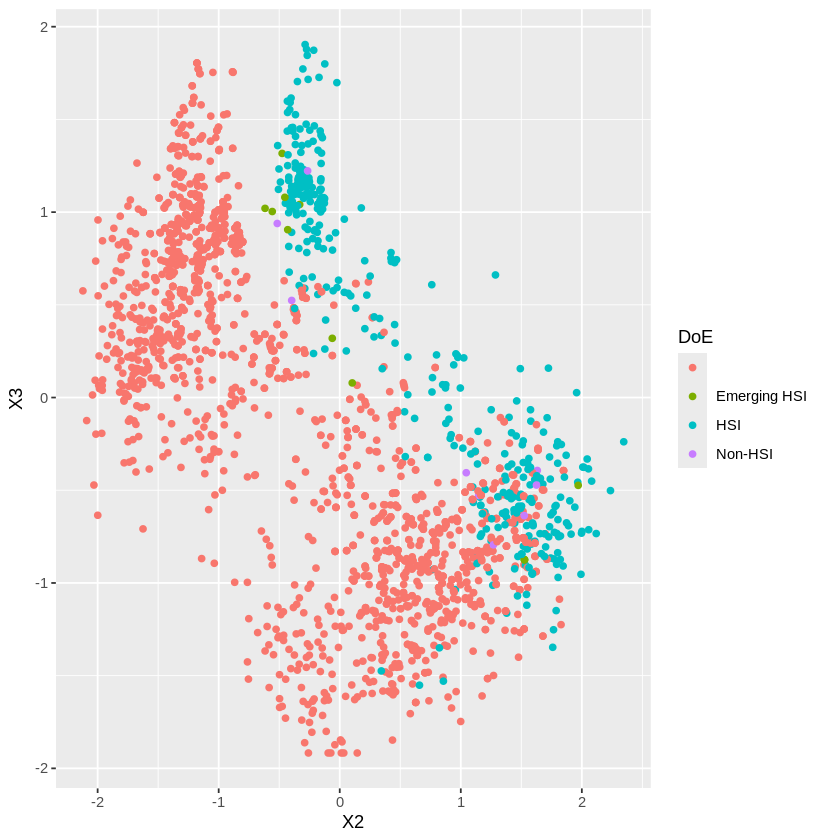

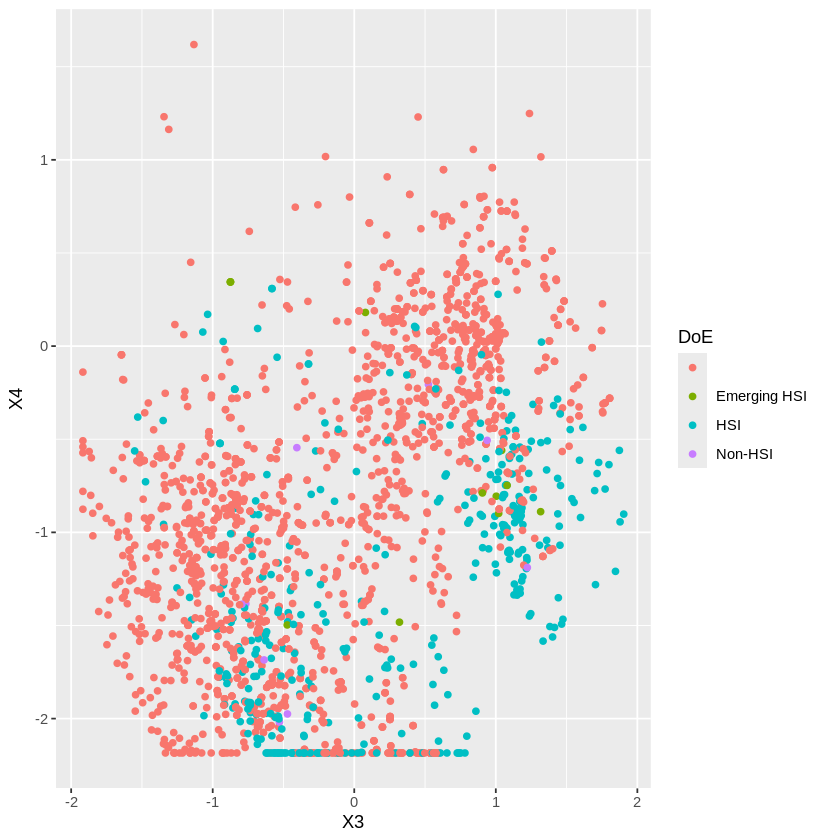

In [5]:
ggplot(dat.hsi,aes(x=X0,y=X1,color=DoE))+
  geom_point()

ggplot(dat.hsi,aes(x=X2,y=X3,color=DoE))+
  geom_point()

ggplot(dat.hsi,aes(x=X3,y=X4,color=DoE))+
  geom_point()

In [6]:
install.packages("flexmix")
library(flexmix)
#

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘modeltools’


Loading required package: lattice



3 : * * *
4 : * * *
5 : * * *
6 : * * *
7 : * * *
8 : * * *


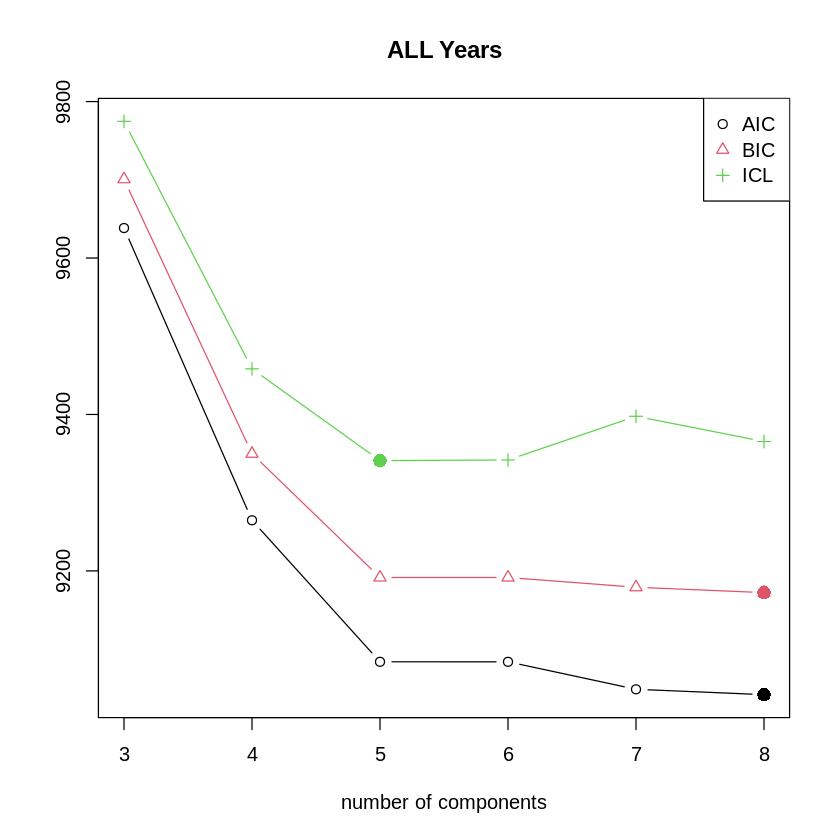

In [18]:
gmmall <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ year | unitid, data = dat.hsi, k = 3:8, model = FLXMRglm())
plot(gmmall,main="ALL Years") # Visualize BIC/ICL values


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ year | unitid, data = dat.hsi, model = FLXMRglm(), 
    k = 8)

       prior size post>0 ratio
Comp.1 0.118  293    844 0.347
Comp.2 0.255  562   1446 0.389
Comp.3 0.190  384    902 0.426
Comp.4 0.167  364   1074 0.339
Comp.5 0.120  257   1649 0.156
Comp.6 0.149  287    516 0.556

'log Lik.' -4497.898 (df=23)
AIC: 9041.797   BIC: 9172.249 


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
coef.(Intercept),386.1337786,159.52940697,-146.80536600,474.912631,1844.7538029,-136.83740440
coef.year,-0.1905012,-0.07903373,0.07171897,-0.233948,-0.9114867,0.06572204
sigma,0.7965345,1.28429561,1.04756565,1.294046,5.5640541,1.10571099


[1] 2 2 2 2 2 5 5 5 6 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 1 1 1 4 6 4 4 4 4
  [38] 4 1 1 1 1 1 4 1 1 1 1 1 4 4 4 2 2 1 1 1 1 1 5 5 5 5 5 2 2 2 2 2 2 2 2 2 3
  [75] 3 3 3 4 4 4 4 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 4 4 4 4 4
 [112] 5 5 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 4 4 1 1 1 1 1 1 1 1 1 5 5 5 5 5 5 5 5 5
 [149] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 1 1 1 1 1 1 1 1 1 1
 [186] 3 4 4 4 4 4 1 1 1 1 4 4 4 4 4 4 4 4 4 4 6 6 6 6 5 5 5 5 5 2 2 2 2 2 2 5 5
 [223] 5 5 4 4 4 4 4 1 1 1 1 1 5 5 5 5 5 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [260] 4 4 4 3 3 3 3 3 1 1 1 1 1 2 2 2 2 2 4 4 4 4 4 4 4 4 1 1 1 1 1 4 4 4 4 4 3
 [297] 3 3 3 4 4 4 4 4 6 6 6 6 6 4 4 4 4 4 6 6 6 6 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3
 [334] 2 2 2 2 3 3 3 3 3 3 3 3 1 1 1 1 1 5 5 5 5 5 1 1 1 1 2 2 2 5 5 5 5 5 4 4 4
 [371] 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 6 1 1 1 1 1 2 2 2 2 2 3
 [408] 3 2 2 2 2 3 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 5 5 5 5 5 2 2 2 2 2 5
 [445] 5 5 5 5 4 4 4 1 1 1 1 1 6 6 6 6 6 6 6 6 6 2 2 2 2 1 4 4 4 4 4 4 4 4 4 4 2
 [482] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 [519] 2 2 1 5 5 5 5 5 1 1 1 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1
 [556] 1 1 4 4 4 4 4 4 6 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 3 3 3 3 1 1 1 1 1 3 3 3 3
 [593] 3 1 1 1 1 1 2 2 2 2 2 3 4 4 4 4 4 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 5
 [630] 5 5 5 5 6 6 2 2 2 2 3 3 3 3 3 1 1 1 6 6 3 3 3 3 4 4 4 3 3 3 3 2 2 2 2 3 3
 [667] 3 3 3 2 2 2 2 2 3 3 3 3 1 4 4 4 4 4 2 1 1 1 1 1 1 1 1 1 4 4 4 4 2 2 2 2 2
 [704] 5 5 5 5 5 6 6 6 6 6 5 5 5 2 2 5 5 5 5 6 6 5 5 5 5 5 3 4 4 4 4 4 5 5 4 4 4
 [741] 4 4 6 6 6 6 6 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 3 4 4 4 6 6 6 6 6 3 3 3 3 3 3
 [778] 3 3 5 5 5 5 5 3 3 3 2 2 2 2 2 2 2 2 2 1 1 1 1 4 4 4 4 4 1 1 1 1 1 1 1 1 1
 [815] 1 4 4 4 4 4 2 2 2 2 2 4 4 4 4 6 6 2 2 2 2 3 3 3 3 3 2 2 2 2 2 2 2 2 2 3 3
 [852] 3 3 3 3 3 3 3 3 6 6 6 6 6 4 4 4 4 4 1 1 1 1 1 6 6 6 6 6 2 2 1 1 1 1 1 3 3
 [889] 3 3 3 2 2 2 2 2 2 5 5 6 1 1 1 2 2 2 2 2 4 2 5 5 5 5 5 2 2 2 6 6 6 4 4 4 4
 [926] 4 2 2 2 2 3 3 2 2 2 2 2 4 4 4 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 2 2 2 2 2 5 5
 [963] 5 4 4 4 4 1 1 1 2 2 2 2 2 4 4 4 4 2 2 2 2 2 6 6 6 4 4 4 4 4 2 2 2 2 2 4 4
[1000] 4 4 4 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 2 2 2 5 5 5 5 5 5
[1037] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 4 4 4 4 4 2 2 2 2 2 3 3 3
[1074] 3 3 2 2 2 2 2 6 6 6 6 6 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 6 6 6 6 6
[1111] 5 5 5 5 5 4 4 4 4 4 1 1 1 1 4 4 4 4 4 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4
[1148] 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 6 6 6 6 6 6 3 3 3 3 3 3 3
[1185] 3 3 3 3 1 1 1 6 3 3 3 3 2 2 2 2 1 1 1 1 3 3 2 2 3 3 1 1 1 1 1 2 2 6 6 6 6
[1222] 6 1 1 1 2 2 2 2 2 2 2 2 2 6 6 6 2 2 2 2 3 3 3 3 4 4 4 4 4 4 2 1 1 1 1 1 1
[1259] 1 1 2 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 2 2 2 2 2 2 2 2 2 1 3 3 3 3 4 4
[1296] 4 4 4 2 2 2 2 2 3 5 5 5 5 5 5 5 5 5 5 1 1 1 3 3 3 3 3 3 3 3 3 6 6 6 6 6 1
[1333] 1 1 4 4 4 4 1 1 1 1 1 3 3 3 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 6 6 2 2 2 2 2 2
[1370] 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 5 5 5 5 5 2
[1407] 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 5 5 5 5 5 2 2 2 2 2 2 2 2 2 4 4 4
[1444] 4 2 2 2 2 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 5 5
[1481] 5 5 5 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 1 1 1 1 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5
[1518] 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 3 3 3 3 2 2 2 2 2 3 2 3 3 3
[1555] 3 3 3 4 4 4 4 4 2 2 2 2 2 4 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 6 6 6 6 6 6 6 6
[1592] 6 6 6 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6
[1629] 6 6 6 6 6 6 6 6 6 6 3 3 3 3 3 3 3 3 3 3 6 6 6 6 6 3 3 3 3 3 5 5 5 5 5 6 6
[1666] 6 6 3 3 3 3 3 6 6 6 6 1 1 1 1 1 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
[1703] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1740] 3 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 3 3 3 3 3 2 2 2 2 2 1 1 1 1 1 6
[1777] 6 6 6 6 5 5 5 5 5 6 6 6 6 6 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 3 3 3 3 3 3 3 3
[1814] 3 3 4 4 4 4 4 3 3 3 3 3 5 5

[1] 2147  529

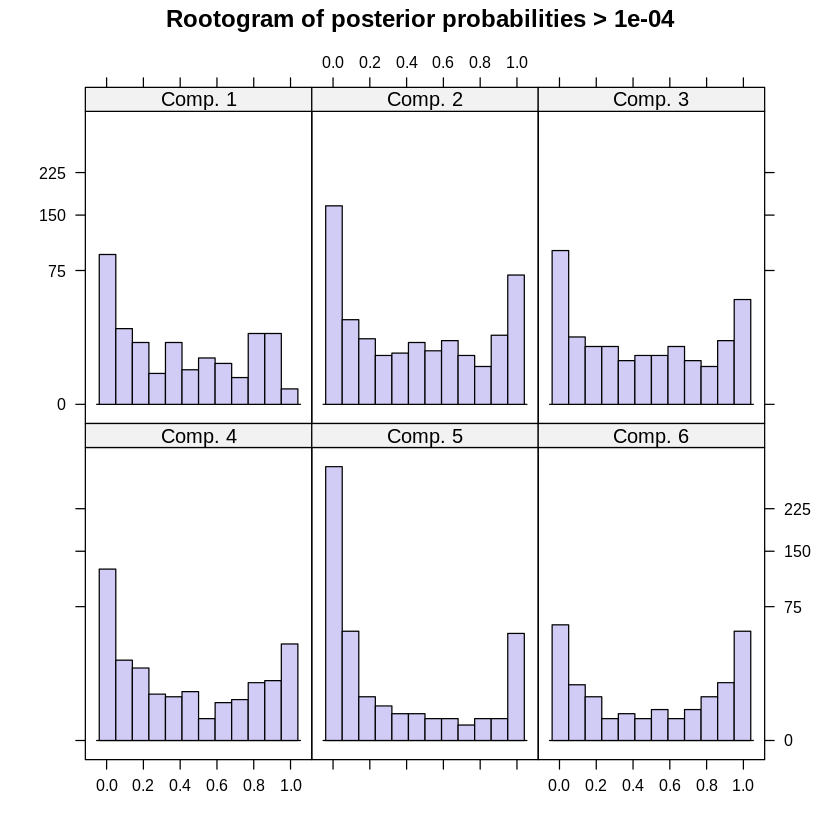

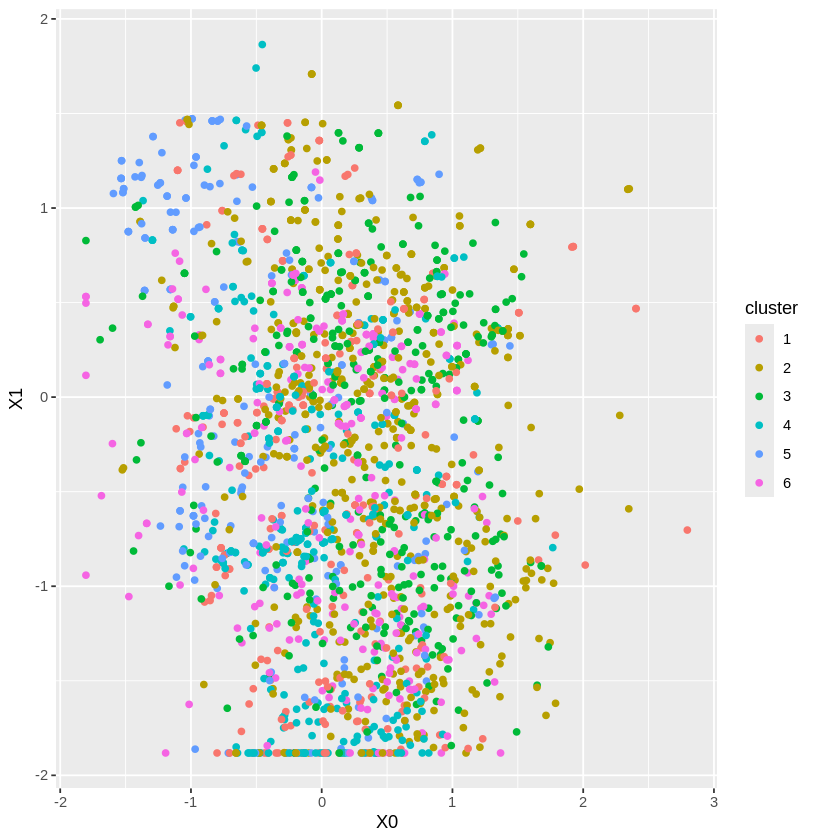

In [26]:
# Extract the model with 3 classes from the stepFlexmix object
gmmall.5 <- getModel(gmmall, which =6)
#
summary(gmmall.5)
parameters(gmmall.5)
clusters(gmmall.5)
# Plot the extracted model
plot(gmmall.5)


dat.hsi$cluster=as.character(clusters(gmmall.5))
dim(dat.hsi)
write.csv(dat.hsi,"all_results.csv")
ggplot(dat.hsi,aes(x=X0,y=X1,color=cluster))+
  geom_point()

In [40]:
install.packages("umap")
library(umap)

# Combine the autoencoder features and PCA scores
features <- dat.hsi[, c("X0", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9",
                       "pca_1", "pca_2", "pca_3", "pca_4", "pca_5", "pca_6", "pca_7", "pca_8", "pca_9", "pca_10")]

# Run UMAP
umap_results <- umap(features)

# Create a data frame for plotting
umap_df <- data.frame(
  UMAP1 = umap_results$layout[, 1],
  UMAP2 = umap_results$layout[, 2],
  status = dat.hsi$excellencia_hsi_status,
  cluster = dat.hsi$cluster
)

# Plot the UMAP results
plt=ggplot(umap_df, aes(x = UMAP1, y = UMAP2, color = cluster, shape = status)) +
  geom_point(alpha = 0.5) +
  labs(title = "UMAP Plot of Combined Features")


jpeg("UMAP.jpeg")
plt
dev.off()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



agg_record_239031867 
                   2

,unitid,year,X0,X1,X2,X3
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
460,104160,2017,0.7548172,-1.619431,-0.4107691,1.0279785
477,104346,2017,0.6835865,-1.587726,-0.3287752,1.4484595
490,104425,2017,0.5974091,-1.381697,-0.3128267,1.3592262
533,104708,2017,-0.6141764,-1.767799,-0.1800469,0.8156468
552,105145,2017,0.3315284,-1.251759,-0.2464842,0.9499032
602,105428,2017,-0.2910273,-1.748884,-0.2278189,0.6501178


3 : * * *
4 : * * *
5 : * * *
6 : * * *
7 : * * *
8 : * * *
3 : * * *
4 : * * *
5 : * * *
6 : * * *
7 : * * *
8 : * * *


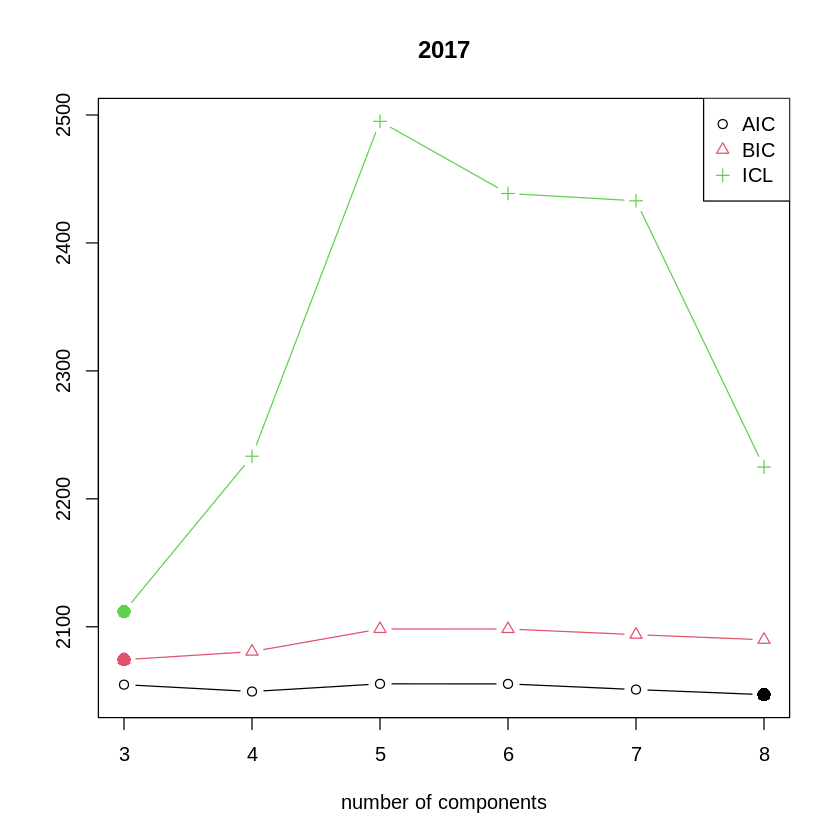

3 : * * *
4 : * * *
5 : * * *
6 : * * *
7 : * * *
8 : * * *


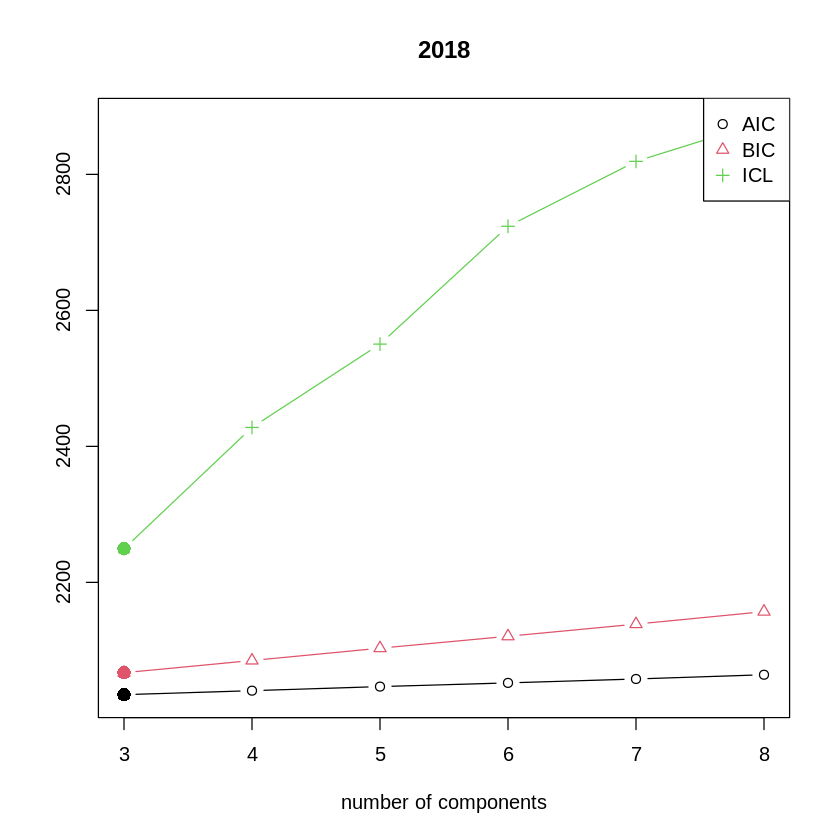

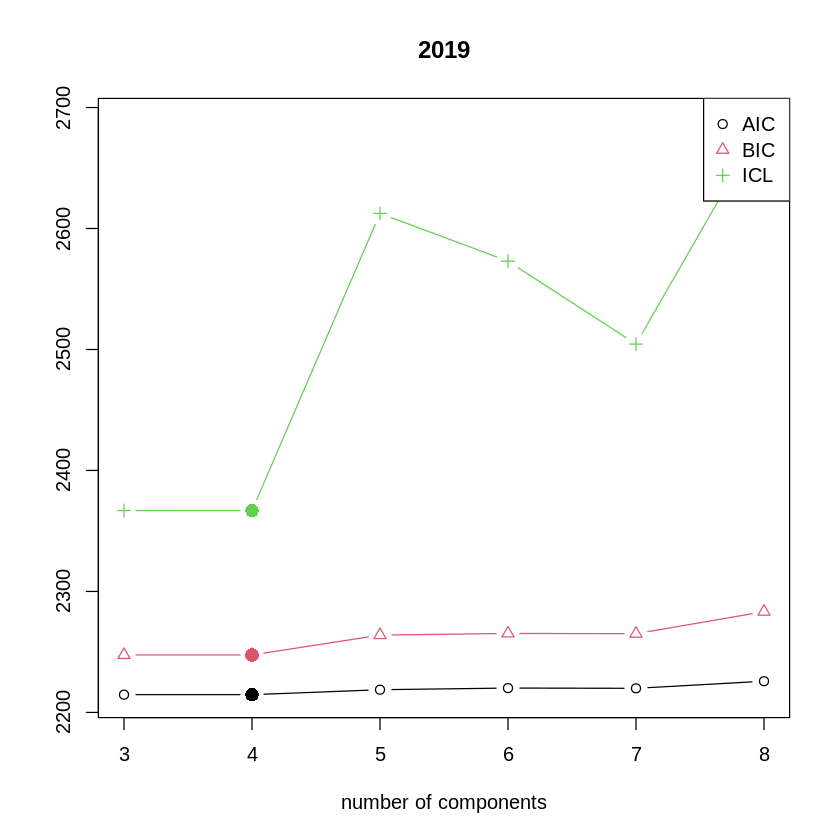

In [16]:

# Fit a GMM with 2 latent classes and linear growth trajectories
# The FLXMRglm driver is used for standard linear models within each class.
# The formula specifies the growth model.
# k specifies the number of latent classes.
# cluster is used to group observations by individual for longitudinal data.
#model_gmm <- flexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10 ~ year_x | unitid, data = dat.hsi, k = 2, model = FLXMRglm())
#summary(model_gmm)
# You can also try different numbers of classes and compare models using BIC or ICL:

#ex2 <- initFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10 ~ year_x | unitid,data = dat.hsi, k = 2:5, model = FLXMCmvnorm(diagonal = FALSE),
#                   control = list(minprior = 0), nrep = 2)
#ex2
#plot(ex2)

head(dat.hsi[dat.hsi$year=="2017",c("unitid","year","X0","X1","X2","X3")])

set.seed(32335)
gmm2017 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year=="2017",], k = 3:8, model = FLXMRglm())
plot(gmm2017,main="2017") # Visualize BIC/ICL values

gmm2018 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year=="2018",], k = 3:8, model = FLXMRglm())
plot(gmm2018,main="2018") # Visualize BIC/ICL values

gmm2019 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year=="2019",], k = 3:8, model = FLXMRglm())
plot(gmm2019,main="2019") # Visualize BIC/ICL values

gmm2020 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year=="2020",], k = 3:8, model = FLXMRglm())
plot(gmm2020,main="2020") # Visualize BIC/ICL values

gmm2021 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year=="2021",], k = 3:8, model = FLXMRglm())
plot(gmm2021,main="2021") # Visualize BIC/ICL values





Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year == 
    "2017", ], model = FLXMRglm(), k = 5)

       prior size post>0  ratio
Comp.1 0.265  117    357 0.3277
Comp.2 0.112   31    365 0.0849
Comp.3 0.343  160    326 0.4908
Comp.4 0.280   57    357 0.1597

'log Lik.' -1016.687 (df=11)
AIC: 2055.374   BIC: 2098.273 


,Comp.1,Comp.2,Comp.3,Comp.4
coef.(Intercept),1.434413,9.135335,-2.990365,0.5675596
sigma,2.224137,8.471707,1.734929,2.5685610


[1] 4 4 4 1 3 1 1 1 1 1 3 1 3 1 4 4 1 1 2 1 1 2 1 2 2 2 2 2 2 3 4 1 1 1 1 1 3
 [38] 1 1 4 1 1 1 1 3 1 3 1 1 1 3 1 3 1 3 1 3 4 3 1 1 1 3 1 1 1 1 3 1 3 4 3 1 1
 [75] 3 1 4 3 1 3 4 1 1 4 1 1 1 1 1 4 2 4 1 1 1 1 3 1 3 3 1 3 1 4 1 1 3 4 3 4 4
[112] 3 3 3 3 4 3 4 4 1 3 2 3 2 2 3 3 2 3 1 3 3 3 2 1 1 1 1 3 3 4 3 3 3 1 4 3 4
[149] 3 4 1 1 1 3 3 3 1 4 4 1 1 3 1 4 1 4 3 3 3 3 2 3 2 3 3 3 2 3 3 4 3 3 3 3 3
[186] 3 2 1 1 4 1 1 1 1 4 1 1 1 3 3 3 3 3 1 3 3 1 3 3 3 4 1 1 4 2 3 3 1 3 2 4 3
[223] 4 4 4 4 1 3 2 4 3 3 3 2 3 3 4 1 1 3 4 1 1 2 3 3 2 3 1 2 2 3 3 2 1 3 1 4 3
[260] 3 3 3 3 3 3 3 1 3 3 3 3 3 4 3 3 2 3 3 3 1 4 4 4 4 3 3 3 3 3 3 3 3 1 3 3 4
[297] 3 3 1 3 2 3 4 1 2 3 3 1 3 2 3 1 3 3 3 3 1 1 3 3 3 3 1 3 1 3 1 1 4 3 1 4 3
[334] 3 3 3 3 3 3 3 3 3 3 1 3 1 4 4 3 3 3 3 3 1 3 3 4 1 3 3 4 4 1 1 1

[1] 365 527

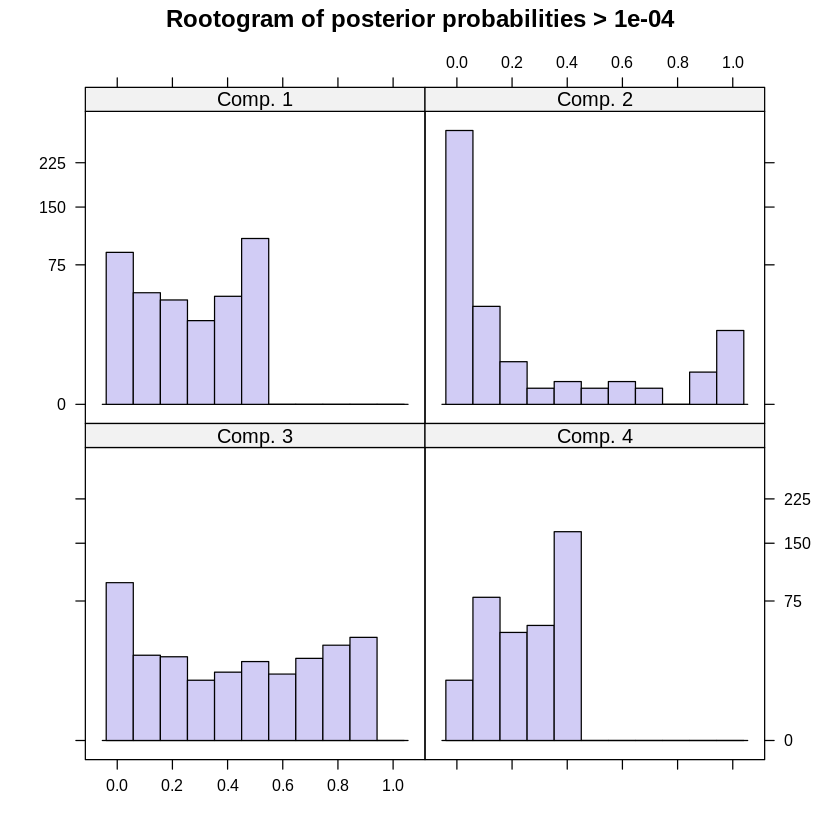

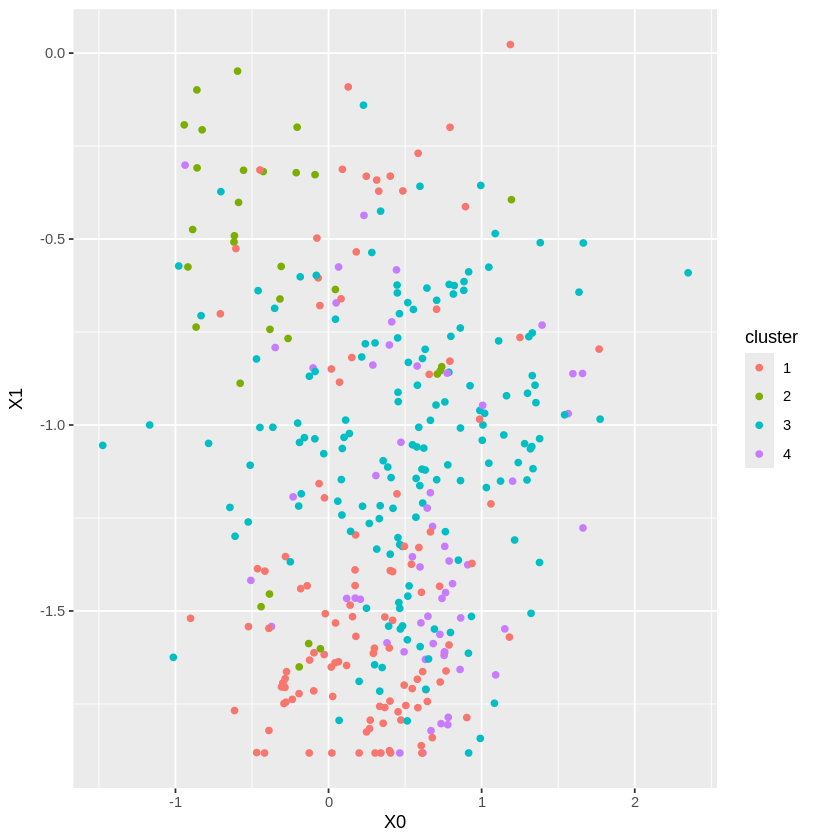

In [8]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2017.3 <- getModel(gmm2017, which =3)
summary(gmm2017.3)
parameters(gmm2017.3)
clusters(gmm2017.3)
# Plot the extracted model
plot(gmm2017.3)

dat17=dat.hsi[dat.hsi$year=="2017",]
dim(dat17)
dat17$cluster=as.character(clusters(gmm2017.3))

ggplot(dat17,aes(x=X0,y=X1,color=cluster))+
  geom_point()


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year == 
    "2018", ], model = FLXMRglm(), k = 5)

        prior size post>0  ratio
Comp.1 0.4489  258    390 0.6615
Comp.2 0.1882  145    408 0.3554
Comp.3 0.1453    0    415 0.0000
Comp.4 0.1390    0    414 0.0000
Comp.5 0.0785   15    418 0.0359

'log Lik.' -1009.343 (df=14)
AIC: 2046.686   BIC: 2103.182 


[1] 418 527

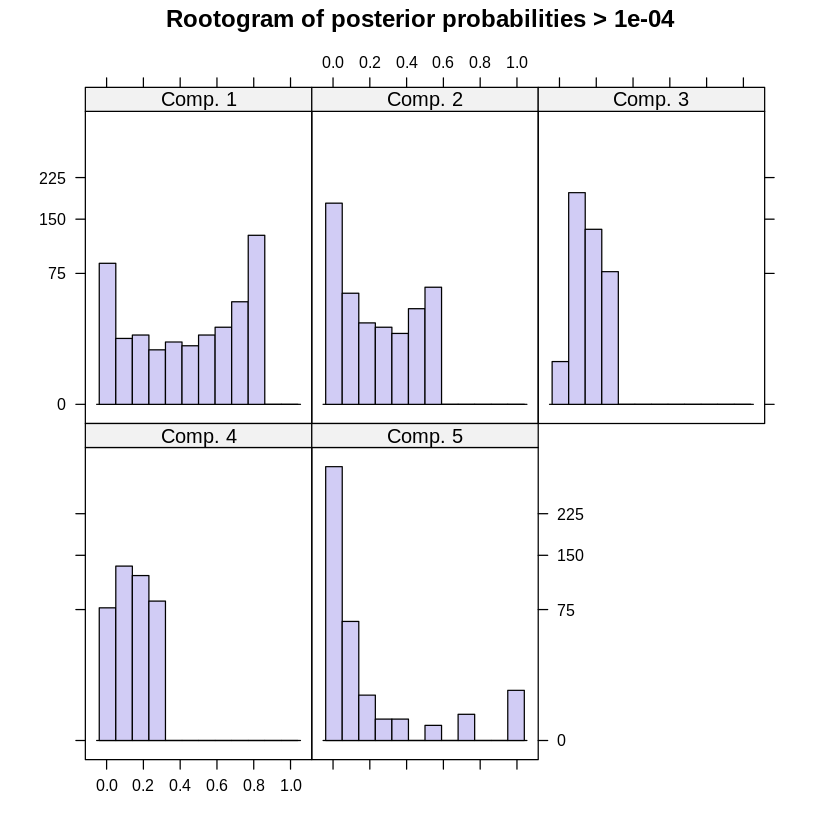

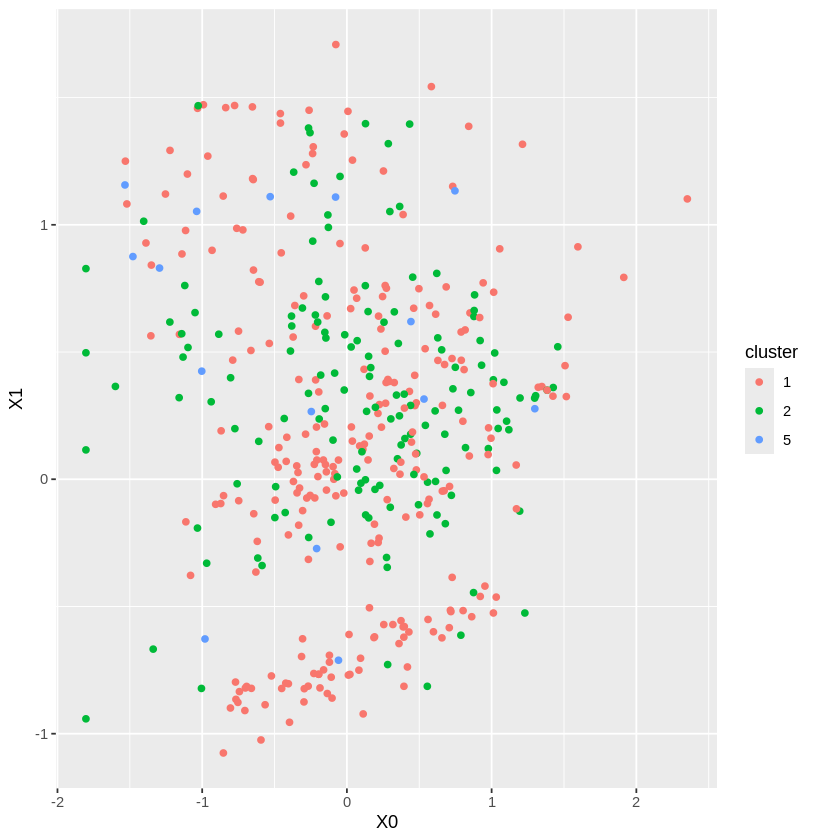

In [9]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2018.3 <- getModel(gmm2018, which =3)
summary(gmm2018.3)
# Plot the extracted model
plot(gmm2018.3)

dat18=dat.hsi[dat.hsi$year=="2018",]
dim(dat18)
dat18$cluster=as.character(clusters(gmm2018.3))

ggplot(dat18,aes(x=X0,y=X1,color=cluster))+
  geom_point()


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year == 
    "2019", ], model = FLXMRglm(), k = 5)

       prior size post>0  ratio
Comp.1 0.399  247    400 0.6175
Comp.2 0.289  161    420 0.3833
Comp.3 0.258   24    445 0.0539
Comp.4 0.055   16    448 0.0357

'log Lik.' -1098.376 (df=11)
AIC: 2218.752   BIC: 2263.905 


[1] 448 527

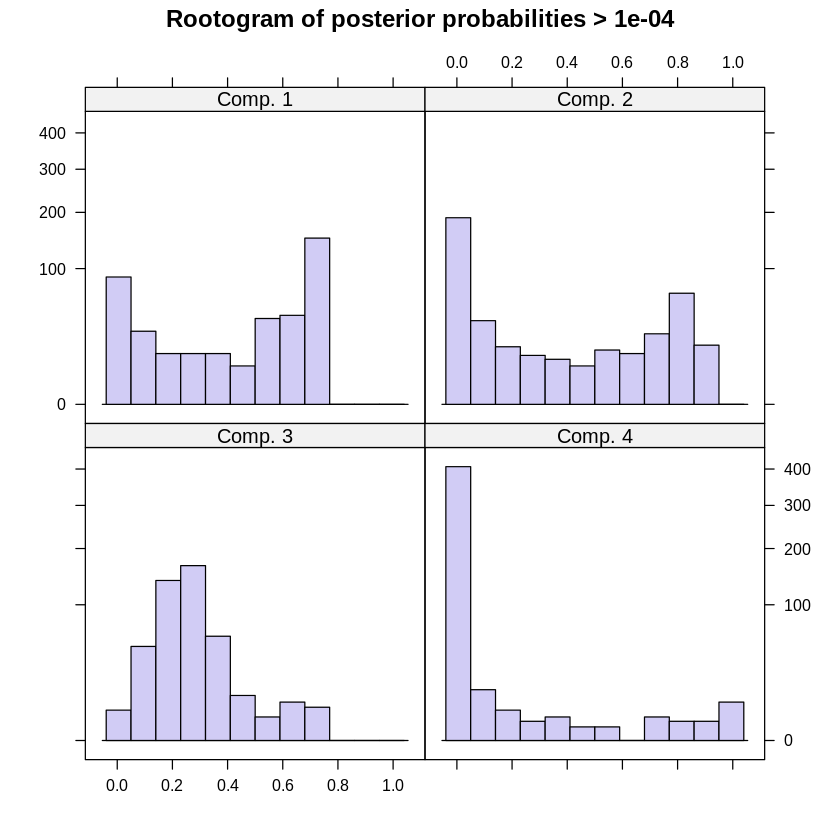

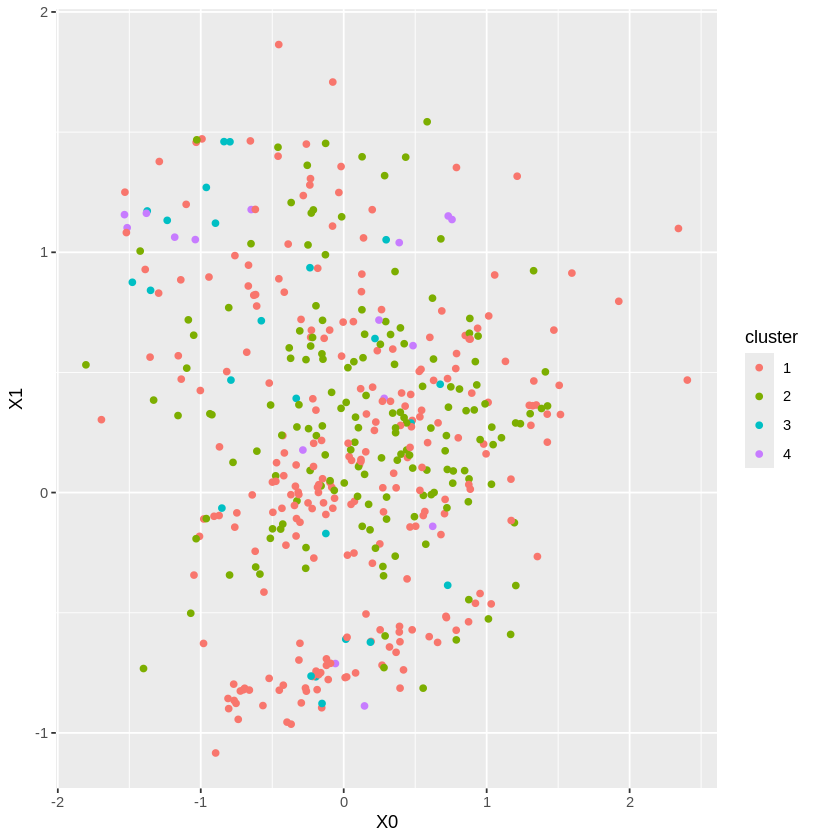

In [10]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2019.3 <- getModel(gmm2019, which =3)
summary(gmm2019.3)
# Plot the extracted model
plot(gmm2019.3)

dat19=dat.hsi[dat.hsi$year=="2019",]
dim(dat19)
dat19$cluster=as.character(clusters(gmm2019.3))

ggplot(dat19,aes(x=X0,y=X1,color=cluster))+
  geom_point()


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year == 
    "2020", ], model = FLXMRglm(), k = 5)

       prior size post>0 ratio
Comp.1 0.312    0    456     0
Comp.2 0.688  458    458     1

'log Lik.' -1126.038 (df=5)
AIC: 2262.075   BIC: 2282.709 


[1] 458 527

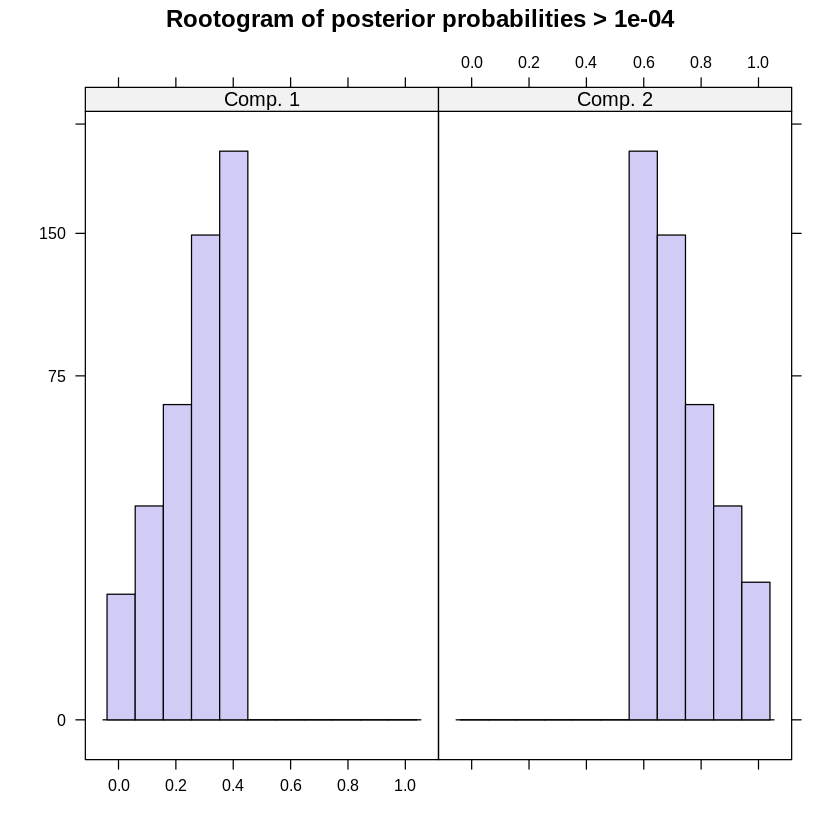

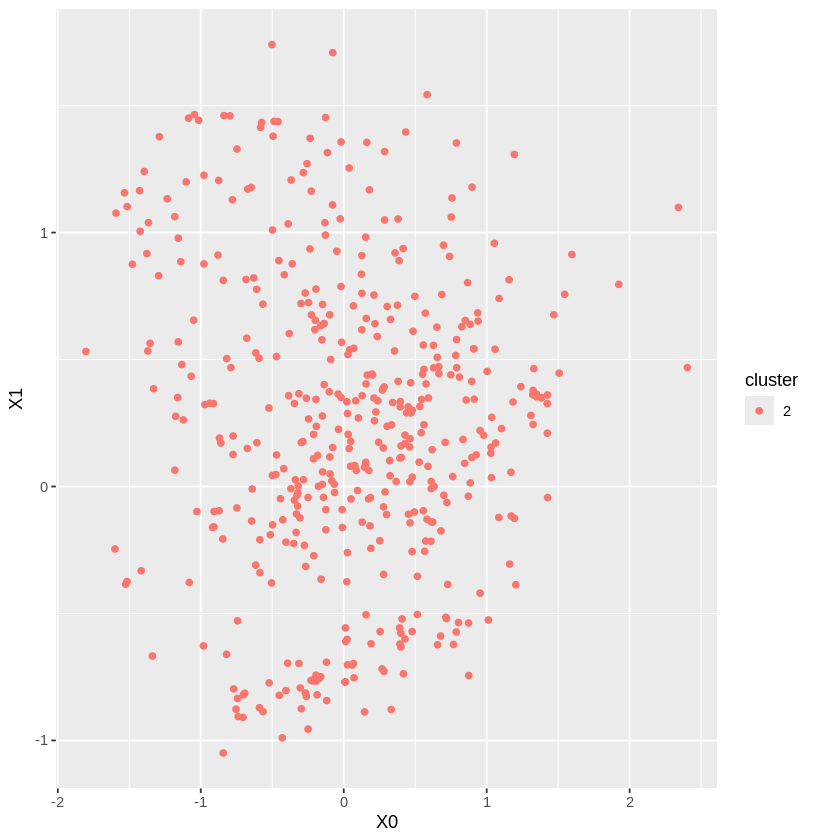

In [11]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2020.3 <- getModel(gmm2020, which =3)
summary(gmm2020.3)
# Plot the extracted model
plot(gmm2020.3)

dat20=dat.hsi[dat.hsi$year=="2020",]
dim(dat20)
dat20$cluster=as.character(clusters(gmm2020.3))

ggplot(dat20,aes(x=X0,y=X1,color=cluster))+
  geom_point()


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year == 
    "2021", ], model = FLXMRglm(), k = 8)

        prior size post>0  ratio
Comp.1 0.5302  226    450 0.5022
Comp.2 0.0541   15    458 0.0328
Comp.3 0.4157  217    445 0.4876

'log Lik.' -1119.758 (df=8)
AIC: 2255.517   BIC: 2288.532 


[1] 458 527

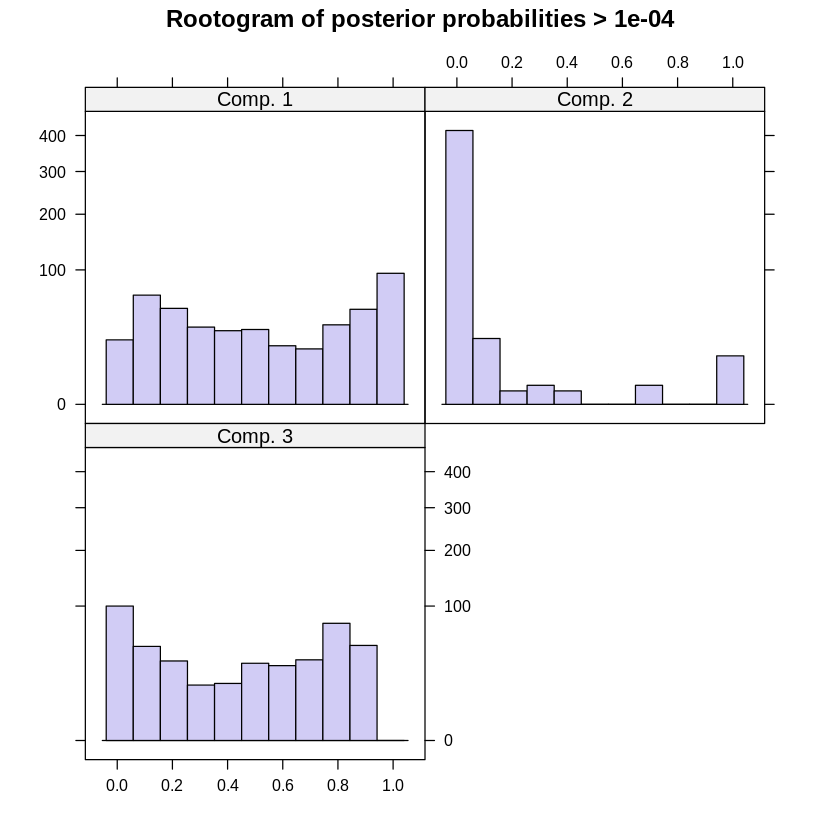

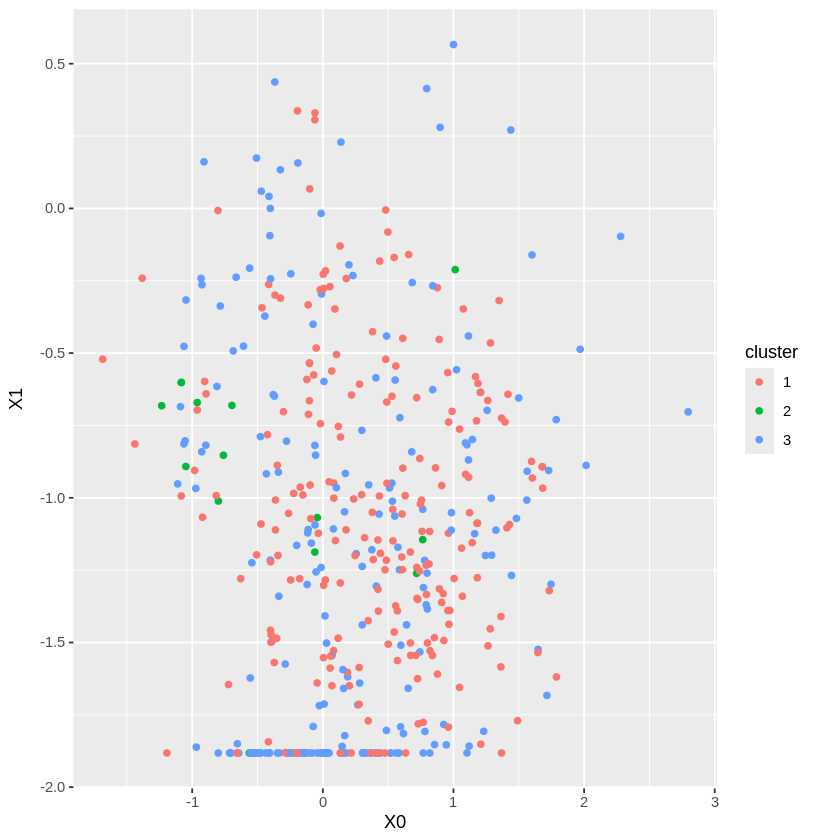

In [12]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2021.3 <- getModel(gmm2021, which =6)
summary(gmm2021.3)
# Plot the extracted model
plot(gmm2021.3)

dat21=dat.hsi[dat.hsi$year=="2021",]
dim(dat21)
dat21$cluster=as.character(clusters(gmm2021.3))

ggplot(dat21,aes(x=X0,y=X1,color=cluster))+
  geom_point()

This will rerun the GMMs but using the original non-autoencoder variables....this is part validation and part alternative mode of analysis

In [13]:
write.csv(dat17,"results17.csv")
write.csv(dat18,"results18.csv")
write.csv(dat19,"results19.csv")
write.csv(dat20,"results20.csv")
write.csv(dat21,"results21.csv")


In [14]:
#install.packages("mice")
#library(mice)
#dat.hsi2=scale(dat.hsi)
#imp=mice(dat.hsi2)
#dat.hsi3=complete(imp,"long")
#dat.hsi4=na.omit(dat.hsi3)
cbind(1:527,names(dat.hsi))
dim(dat.hsi)
set.seed(32335)



1,Unnamed..0
2,unitid
3,year
4,row_number
5,inst_name
6,longitude
7,latitude
8,address
9,state_abbr
10,zip
11,phone_number


[1] 2147  527

In [15]:
install.packages("psych")
library(psych)
dim(dat.hsi)
head(dat.hsi[,3812:3831])
pc <- prcomp(dat.hsi[,c(3812:3831)],
             center = TRUE,
            scale. = TRUE)
attributes(pc)
summary(pc)
pcsc=data.frame(unitid=dat.hsi$unitid,year=dat.hsi$year,hsi_code=dat.hsi$hsi_code,hsi_stem_code=dat.hsi$hsi_stem_code,excellencia_hsi_status=dat.hsi$excellencia_hsi_status,DoE=dat.hsi$DoE,pc$x[,1:10])
head(pcsc)


plt=pairs.panels(pc$x[,1:10],
             gap=0,
             bg = c("red", "yellow", "blue")[dat.hsi$excellencia_hsi_status],
             pch=21)

jpeg("pairs.jpeg")
plt
dev.off()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




[1] 2147  527

ERROR: Error in `[.data.frame`(dat.hsi, , 3812:3831): undefined columns selected


In [ ]:
pc17=pcsc[pcsc$year==2017,]
pc18=pcsc[pcsc$year==2018,]
pc19=pcsc[pcsc$year==2019,]
pc20=pcsc[pcsc$year==2020,]
pc21=pcsc[pcsc$year==2021,]
dim(pc17);dim(pcsc)

In [ ]:
gmm2017 <- stepFlexmix(PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10 ~ 1 | unitid, data = pc17, k = 2:5, model = FLXMRglm())
plot(gmm2017,main="2017") # Visualize BIC/ICL values

gmm2018 <- stepFlexmix(PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10 ~ 1 | unitid, data = pc18, k = 2:5, model = FLXMRglm())
plot(gmm2018,main="2018") # Visualize BIC/ICL values

gmm2019 <- stepFlexmix(PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10 ~ 1 | unitid, data = pc19, k = 2:5, model = FLXMRglm())
plot(gmm2019,main="2019") # Visualize BIC/ICL values

gmm2020 <- stepFlexmix(PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10 ~ 1 | unitid, data = pc20, k = 2:5, model = FLXMRglm())
plot(gmm2020,main="2020") # Visualize BIC/ICL values

gmm2021 <- stepFlexmix(PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10 ~ 1 | unitid, data = pc21, k = 2:5, model = FLXMRglm())
plot(gmm2021,main="2021") # Visualize BIC/ICL values